In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [2]:
data = pd.read_csv('solSentiment.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2021-12-02 00:00:00+00:00,229.854706,243.111664,220.387177,233.993042,4074103518,2.466667,-0.115112,0.526768,194.199219,0
1,2021-12-06 00:00:00+00:00,196.547485,197.663025,176.888062,194.199219,3693853028,2.433333,-0.147124,0.543434,194.621704,1
2,2021-12-08 00:00:00+00:00,190.505005,196.374115,184.132706,194.621704,2277446203,2.400000,-0.176140,0.560101,181.178085,0
3,2021-12-09 00:00:00+00:00,194.483292,196.689743,178.792145,181.178085,1968182104,2.466667,-0.215607,0.582323,155.213058,0
4,2021-12-13 00:00:00+00:00,173.099930,173.099930,148.571823,155.213058,2547597256,2.533333,-0.234919,0.593434,153.341446,0
...,...,...,...,...,...,...,...,...,...,...,...
156,2024-02-19 00:00:00+00:00,112.178825,114.717979,111.081413,111.485329,1898655220,2.933333,-0.214769,0.604246,108.459641,0
157,2024-02-20 00:00:00+00:00,111.483444,112.036743,104.890228,108.459641,2656976089,3.100000,-0.202918,0.598690,105.125221,0
158,2024-02-21 00:00:00+00:00,108.452667,108.452667,100.412018,105.125221,2246861647,3.166667,-0.180640,0.587579,176.679749,1
159,2024-03-14 00:00:00+00:00,163.839935,177.892624,160.233551,176.679749,8399967972,3.133333,-0.147472,0.570913,202.123566,1


In [3]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5757575757575758
Confusion Matrix:
[[ 7  4]
 [10 12]]


In [9]:
import pandas as pd

# Read the CSV file
data_from_sol = pd.read_csv("sol.csv")

# Get the last row
last_row_sol = data_from_sol.iloc[-1]

print("Last row from sol.csv:")
print(last_row_sol)


Last row from sol.csv:
Date            2024-06-18 00:00:00+00:00
Open                           143.314697
High                           143.552597
Low                            131.707748
Close                          131.972504
Volume                         3746947584
Dividends                             0.0
Stock Splits                          0.0
Name: 1530, dtype: object


In [10]:
import pandas as pd

# Read the CSV file for sentiment data related to 'sol'
sentiment_from_sol = pd.read_csv("solana_sentiment.csv")

# Get the last row
last_row_sol_sentiment = sentiment_from_sol.iloc[-1]

print("Last row from solana_sentiment.csv:")
print(last_row_sol_sentiment)


Last row from solana_sentiment.csv:
Unnamed: 0       2024-03-17
edit_count              2.9
sentiment          -0.15647
neg_sentiment      0.575079
Name: 160, dtype: object


In [11]:
# Function to fetch the latest data for Sol
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_sol['Open'],
        "high": last_row_sol['High'],
        "low": last_row_sol['Low'],
        "close": last_row_sol['Close'],
        "volume": last_row_sol['Volume'],
        "edit_count": last_row_sol_sentiment['edit_count'],
        "sentiment": last_row_sol_sentiment['sentiment'],
        "neg_sentiment": last_row_sol_sentiment['neg_sentiment']
    }
    return latest_data

In [12]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,143.314697,143.552597,131.707748,131.972504,3746947584,2.9,-0.15647,0.575079


In [13]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Solana Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

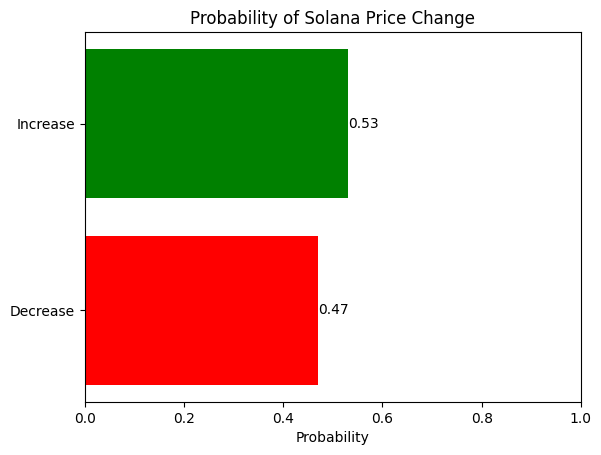

In [15]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [16]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.47
Probability of price increase: 0.53


In [17]:
import pickle 
with open('sol_prob.pkl', 'wb') as f:
    pickle.dump(model, f)